Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **3. studenog 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [280]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [281]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [282]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [283]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Accuracy score is: 1.0


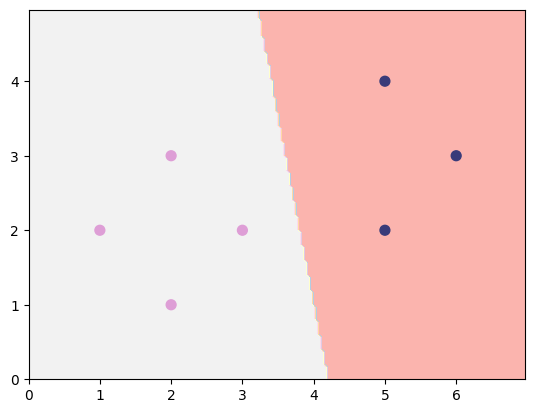

In [284]:
# Vaš kôd ovdje
alpha = 0
model = RidgeClassifier(alpha=alpha).fit(seven_X, seven_y)
predicted_seven_y = model.predict(seven_X)
acc_score = accuracy_score(seven_y, predicted_seven_y)
print(f"Accuracy score is: {acc_score}")

plot_2d_clf_problem(seven_X, seven_y, lambda x: model.predict(x))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

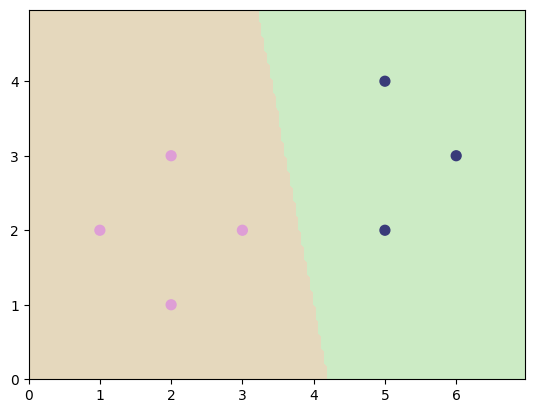

In [285]:
# Vaš kôd ovdje
model = LinearRegression().fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x: model.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [286]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy score is: 0.875


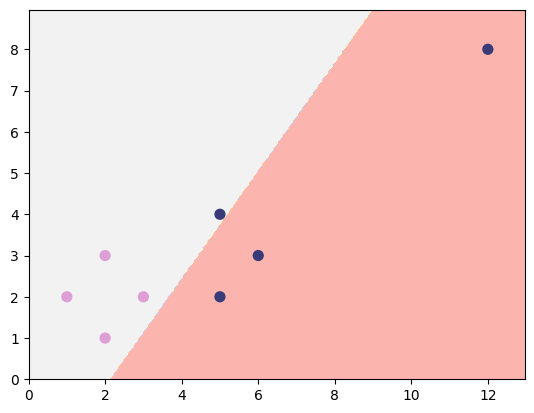

In [287]:
# Vaš kôd ovdje
alpha = 0
model = RidgeClassifier(alpha=alpha).fit(outlier_X, outlier_y)
predicted_outlier_y = model.predict(outlier_X)
acc_score = accuracy_score(outlier_y, predicted_outlier_y)
print(f"Accuracy score is: {acc_score}")

plot_2d_clf_problem(outlier_X, outlier_y, lambda x: model.predict(x))


**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [288]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy score is: 0.875


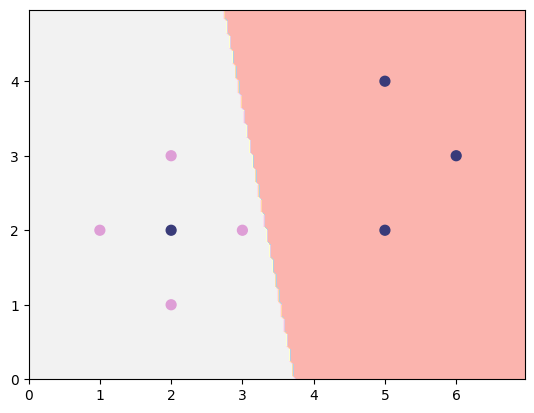

In [289]:
# Vaš kôd ovdje
alpha = 0
model = RidgeClassifier(alpha=alpha).fit(unsep_X, unsep_y)
predicted_unsep_y = model.predict(unsep_X)
acc_score = accuracy_score(unsep_y, predicted_unsep_y)
print(f"Accuracy score is: {acc_score}")

plot_2d_clf_problem(unsep_X, outlier_y, lambda x: model.predict(x))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

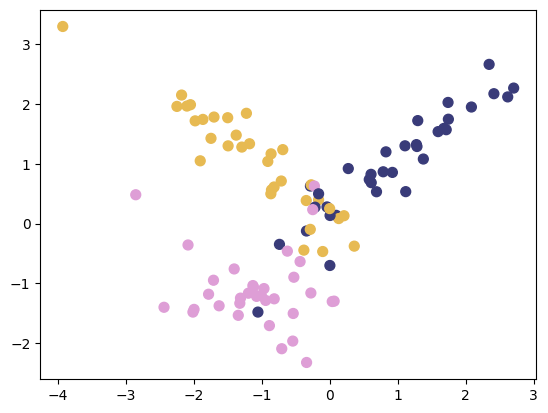

In [290]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
features, redundant, classes, cluster_per_class= 2, 0, 3, 1
X, y = make_classification(n_features=features, n_redundant=redundant, n_classes=classes, n_clusters_per_class=cluster_per_class)
plot_2d_clf_problem(X,y)


Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

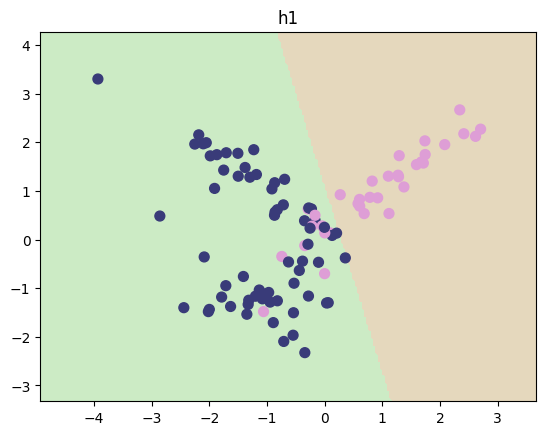

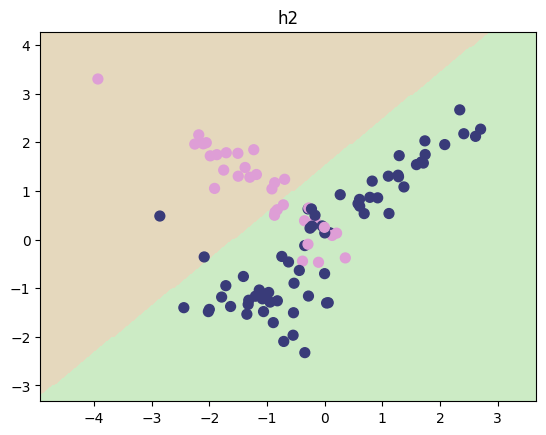

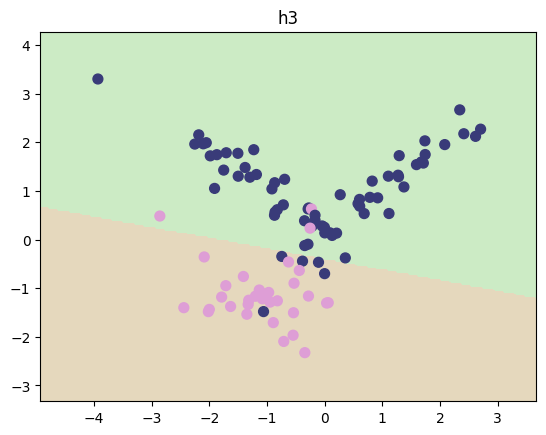

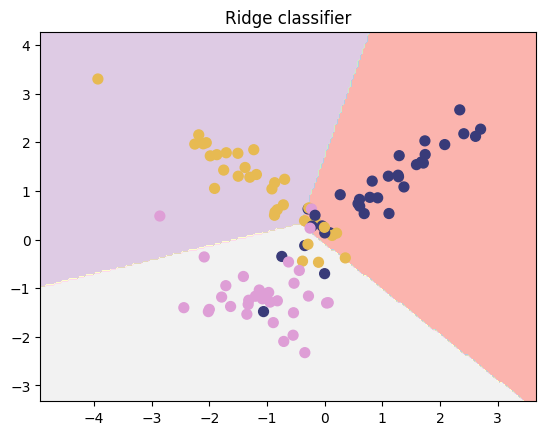

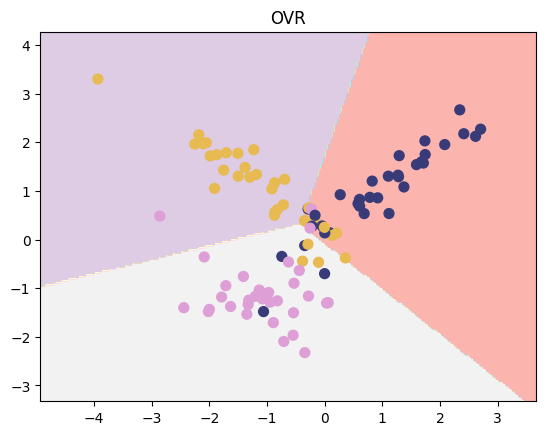

In [291]:
# Vaš kôd ovdje
def predict(x, h1, h2, h3):
    p1 = h1.predict(x)
    p2 = h2.predict(x)
    p3 = h3.predict(x)

    result = []

    for i in range(len(x)):
        values = [p1[i], p2[i], p3[i]]
        max = np.argmax(values)
        result.append(max)

    return np.array(result)

y1, y2, y3 = [], [], []
for i in y:
    if i == 0:
        y1.append(1)
        y2.append(0)
        y3.append(0)
    if i == 1:
        y1.append(0)
        y2.append(1)
        y3.append(0)
    if i == 2:
        y1.append(0)
        y2.append(0)
        y3.append(1)

h1 = LinearRegression().fit(X, y1)
h2 = LinearRegression().fit(X, y2)
h3 = LinearRegression().fit(X, y3)

alpha = 0
model = RidgeClassifier(alpha=alpha).fit(X,y)

plt.title("h1")
plot_2d_clf_problem(X,y1, lambda x: h1.predict(x) >= 0.5)
plt.show()

plt.title("h2")
plot_2d_clf_problem(X,y2, lambda x: h2.predict(x) >= 0.5)
plt.show()

plt.title("h3")
plot_2d_clf_problem(X,y3, lambda x: h3.predict(x) >= 0.5)
plt.show()

plt.title("Ridge classifier")
plot_2d_clf_problem(X,y, lambda x: model.predict(x))
plt.show()

plt.title("OVR")
plot_2d_clf_problem(X,y, lambda x: predict(x, h1, h2, h3))
plt.show()


### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{weight}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

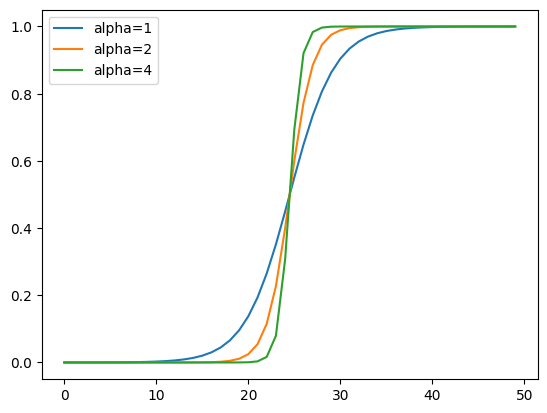

In [292]:
# Vaš kôd ovdje
def sigmoida(x,alpha=1):
    return (1)/(1+np.exp(-alpha * x))

alpha = [1,2,4]
x = np.linspace(-10,10)
for a in alpha:
    plt.plot(sigmoida(x, a), label="alpha={}".format(a))
plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{weight}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{weight}^0,\mathbf{weight}^1,\dots,\mathbf{weight}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,weight)` koja daje predikciju za primjer `x` uz zadane težine `weight`. Također, preporučamo i funkciju `cross_entropy_error(X,y,weight)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [293]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x,weight):
    phi = PolynomialFeatures(degree=1).fit_transform(x.reshape(1,-1))
    result = np.dot(phi, weight)
    result = sigmoida(result)
    return result

def cross_entropy_error(X,y, weight):
    e = 0
    n = X.shape[0]
    for i in range(n):
        e += (-y[i] * np.log(lr_h(X[i],weight)) - (1-y[i]) * np.log(1-(lr_h(X[i],weight))))[0]
    res = e / n
    return res

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    p_err = float('inf')
    weight_t = []

    dim_0, dim_1 = X.shape[0], X.shape[1]
    weight = np.zeros(dim_1+1, dtype=float)
    weight_t.append(weight.copy())
    

    current_iter = 1
    while current_iter < max_iter:
        delta_w0 = 0
        delta_w = np.zeros(dim_1, dtype=float)

        j = 0
        while j < dim_0:
            delta_w0 = delta_w0 + lr_h(X[j],weight) - y[j]
            delta_w = delta_w + ((lr_h(X[j],weight))-y[j]) * X[j]
            j += 1
        cross_ent_err = cross_entropy_error(X,y,weight)
        error = cross_ent_err * dim_0

        for i in range(len(weight)):
            if i == 0:
                weight[i] = weight[i] - eta * delta_w0
            elif i > 0:
                weight[1:] = weight[1:] * (1-eta * alpha) - eta * delta_w

        weight_t.append(weight.copy())
        current_iter += 1

        if abs(p_err - error) < epsilon:
            break
        else:
            p_err = error

        
    if trace:
        return weight, weight_t
    else:
        return weight

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [294]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Tezine: [ 6.48610476 -2.13793984  0.55637599]
Pogreska unakrsne entropije: 0.07653854389942803


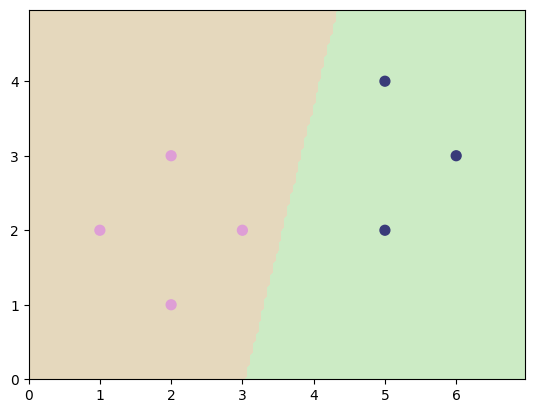

In [295]:
# Vaš kôd ovdje
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

weight, weight_t = lr_train(seven_X, seven_y, trace=True)
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x,weight) >= 0.5)
cross_ent_err = cross_entropy_error(seven_X, seven_y, weight)
print(f"Tezine: {weight}")
print(f"Pogreska unakrsne entropije: {cross_ent_err}")

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [296]:
from sklearn.metrics import zero_one_loss

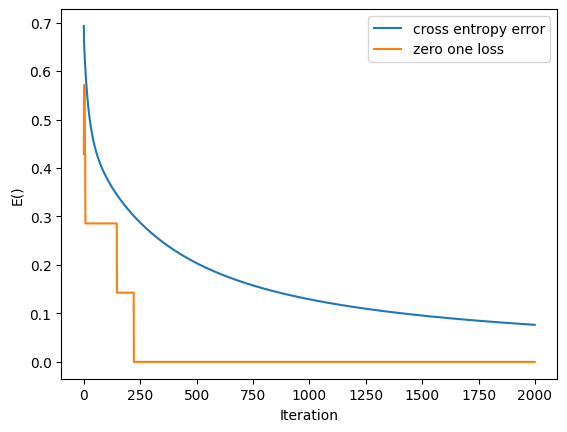

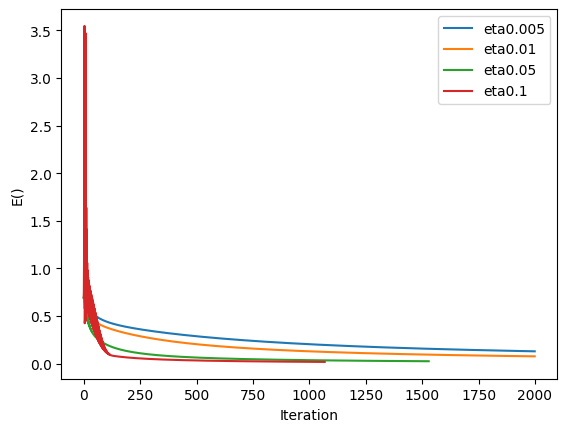

In [297]:
# Vaš kôd ovdje
weight, weight_t = lr_train(seven_X, seven_y, trace=True)

ce, zo = [], []
etas = [0.005, 0.01, 0.05, 0.1]

for i in range(len(weight_t)):
    h = []
    ce.append(cross_entropy_error(seven_X, seven_y, weight_t[i]))
    for j in range(seven_X.shape[0]):
        h.append(lr_h(seven_X[j], weight_t[i]))
    predicted_y = []
    for j in range(len(h)):
        if h[j] >= 0.5:
            predicted_y.append(int(1))
        else:
            predicted_y.append(int(0))
    zo.append(zero_one_loss(seven_y, predicted_y))

plt.plot(range(len(weight_t)),ce, label="cross entropy error")
plt.plot(range(len(weight_t)),zo, label="zero one loss")
plt.xlabel("Iteration")
plt.ylabel("E()")
plt.legend()
plt.show()

for j in range(len(etas)):
    weight, weight_t = lr_train(seven_X, seven_y, trace=True, eta=etas[j])
    eta_errors = []

    for i in range(len(weight_t)):
        eta_errors.append(cross_entropy_error(seven_X, seven_y, weight_t[i]))
    plt.plot(eta_errors, label="eta{0}".format(etas[j]))
plt.xlabel("Iteration")
plt.ylabel("E()")
plt.legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Tezine: [5.33129609], [[-1.18244419 -0.30251926]]


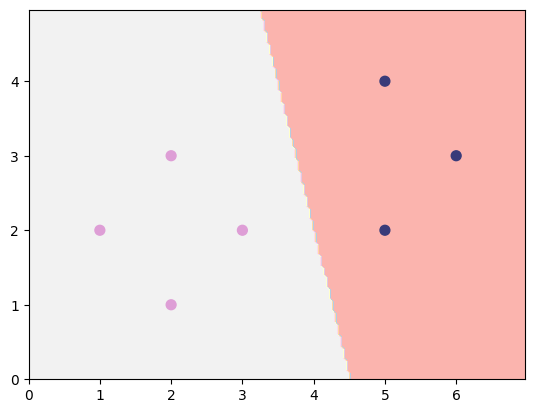

In [298]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
model = LogisticRegression(max_iter=2000, tol=0.0001).fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x: model.predict(x))
print(f"Tezine: {model.intercept_}, {model.coef_}")

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [299]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Tezine: [5.33316637], [[-1.18261873 -0.30287041]]


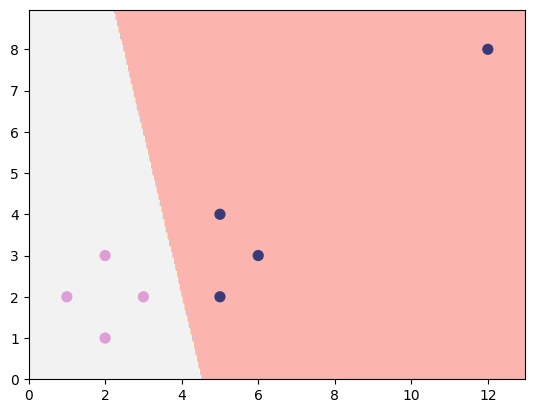

In [300]:
# Vaš kôd ovdje
model = LogisticRegression(max_iter=2000, tol=0.0001).fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: model.predict(x))
print(f"Tezine: {model.intercept_}, {model.coef_}")

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

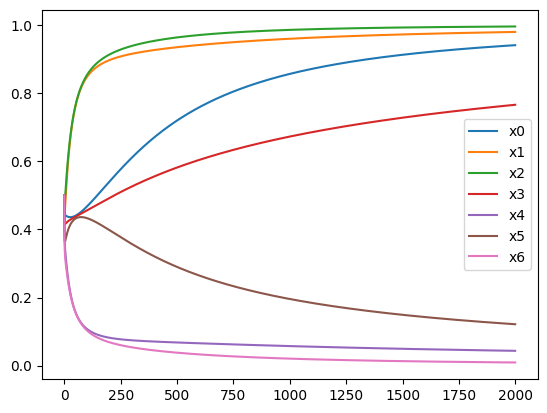

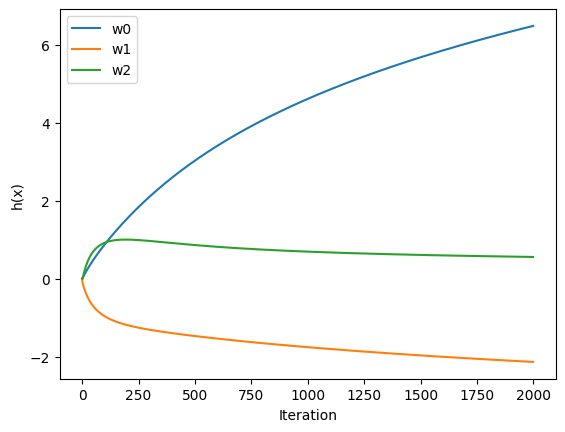

In [301]:
# Vaš kôd ovdje
weight, weight_t = lr_train(seven_X, seven_y, trace=True)
w0,w1,w2 = [],[],[]
for i in range(len(weight_t)):
    w0.append(weight_t[i][0])
    
for i in range(len(weight_t)):
    w1.append(weight_t[i][1])

for i in range(len(weight_t)):
    w2.append(weight_t[i][2])

i = 0
for x in seven_X:
    hi = []
    for j in range(len(weight_t)):
        hi.append(lr_h(x, weight_t[j]))
    plt.plot(hi, label="x{}".format(i))
    i += 1
plt.legend()
plt.show()

plt.plot(w0, label="w0")
plt.plot(w1, label="w1")
plt.plot(w2, label="w2")
plt.xlabel("Iteration")
plt.ylabel("h(x)")
plt.legend()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [302]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

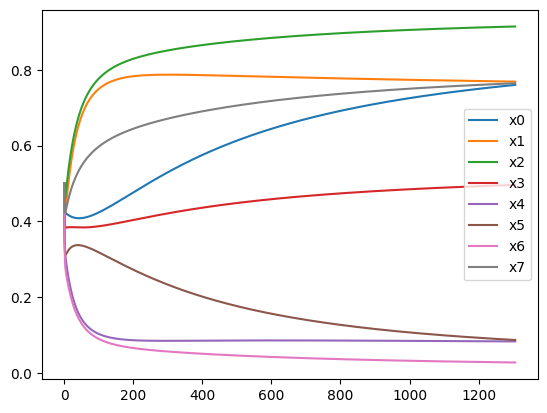

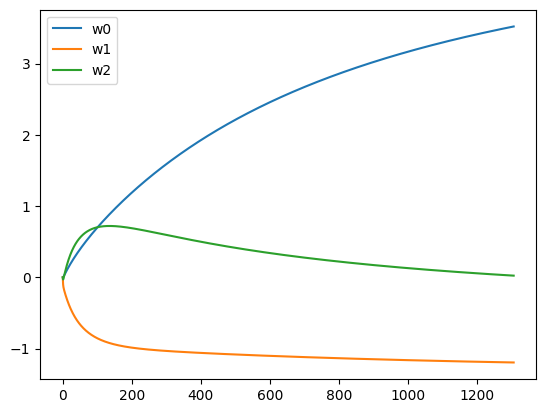

In [303]:
# Vaš kôd ovdje
weight, weight_t = lr_train(unsep_X, unsep_y, trace=True)
w0,w1,w2 = [],[],[]
for i in range(len(weight_t)):
    w0.append(weight_t[i][0])

for i in range(len(weight_t)):
    w1.append(weight_t[i][1])

for i in range(len(weight_t)):
    w2.append(weight_t[i][2])
    
i = 0
for x in unsep_X:
    hi = []
    for j in range(len(weight_t)):
        hi.append(lr_h(x, weight_t[j]))
    plt.plot(hi, label="x{}".format(i))
    i+= 1
plt.legend()
plt.show()

plt.plot(w0, label="w0")
plt.plot(w1, label="w1")
plt.plot(w2, label="w2")
plt.legend()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [304]:
from numpy.linalg import norm

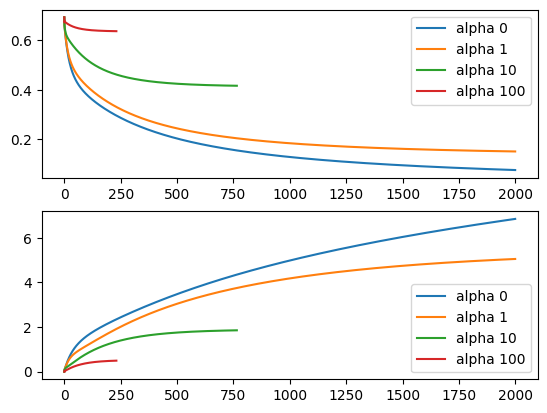

In [305]:
# Vaš kôd ovdje
a = [0, 1, 10, 100]

for j in range(len(a)):
    weight, weight_t = lr_train(seven_X, seven_y, trace=True, alpha=a[j])
    errors, l2_norm = [], []
    
    for i in range(len(weight_t)):
        errors.append(cross_entropy_error(seven_X, seven_y, weight_t[i]))
    plt.subplot(2,1,1)
    plt.plot(errors, label="alpha {}".format(a[j]))
    plt.legend()

    for i in range(len(weight_t)):
        l2_norm.append(norm(weight_t[i]))
    plt.subplot(2,1,2)
    plt.plot(l2_norm, label="alpha {}".format(a[j]))
    plt.legend()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [306]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

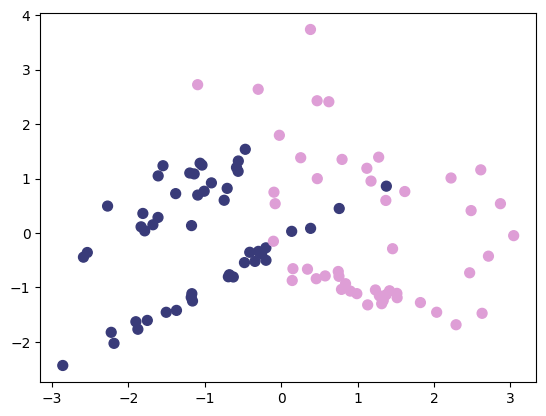

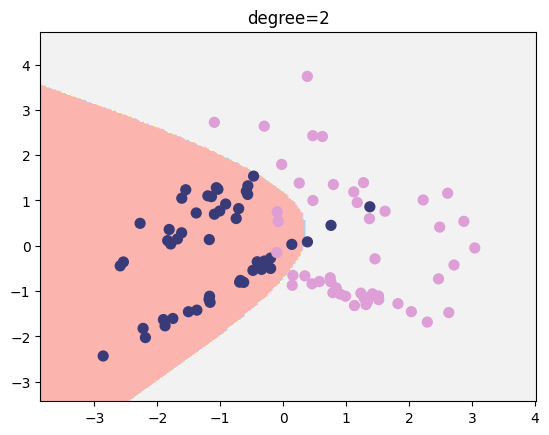

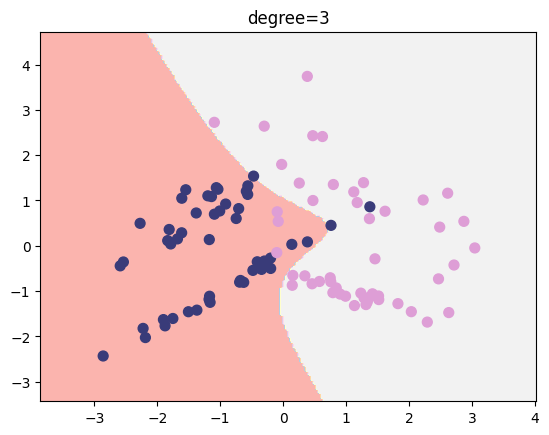

In [308]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje

X,y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
plot_2d_clf_problem(X,y)
plt.show()

polynomial_model = PolynomialFeatures(degree=2)
phi = polynomial_model.fit_transform(X)
log_model = LogisticRegression().fit(phi,y)
plot_2d_clf_problem(X,y, lambda x: log_model.predict(polynomial_model.transform(x)))
plt.title("degree=2")
plt.show()

polynomial_model = PolynomialFeatures(degree=3)
phi = polynomial_model.fit_transform(X)
log_model = LogisticRegression().fit(phi,y)
plot_2d_clf_problem(X,y, lambda x: log_model.predict(polynomial_model.transform(x)))
plt.title("degree=3")
plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?